In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../datasets/train.csv")
df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


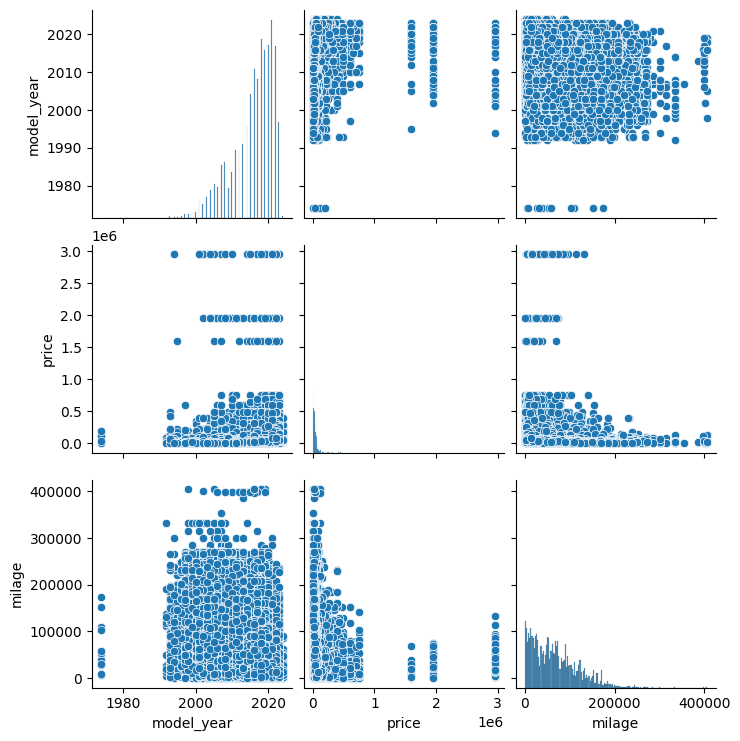

In [6]:
sns.pairplot(df[['model_year', 'price', 'milage']])

## Milage kde plots

<Axes: xlabel='milage', ylabel='Density'>

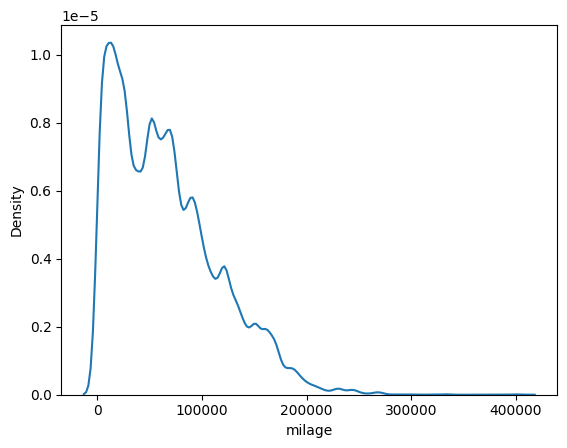

In [7]:
sns.kdeplot(df.milage)

<Axes: xlabel='milage', ylabel='Density'>

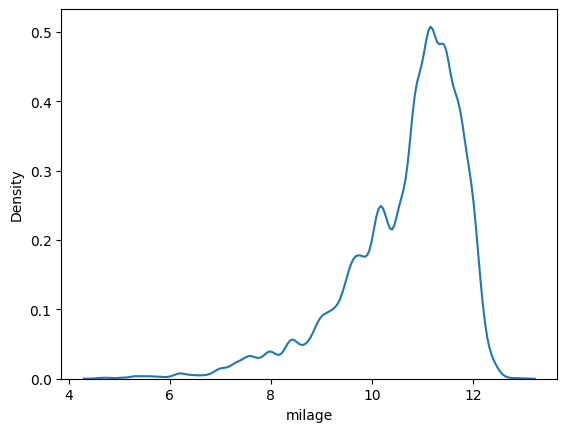

In [8]:
# Log transform on milage

sns.kdeplot(np.log(df.milage))

C:\Users\MercadosEMI\AppData\Local\Temp\ipykernel_24880\728347378.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(scipy.stats.boxcox(df.milage))


<Axes: ylabel='Density'>

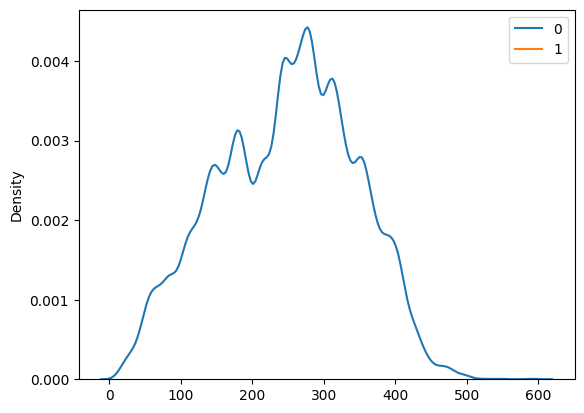

In [9]:
import scipy
import scipy.stats
sns.kdeplot(scipy.stats.boxcox(df.milage))

## Prices kde

<Axes: xlabel='price', ylabel='Density'>

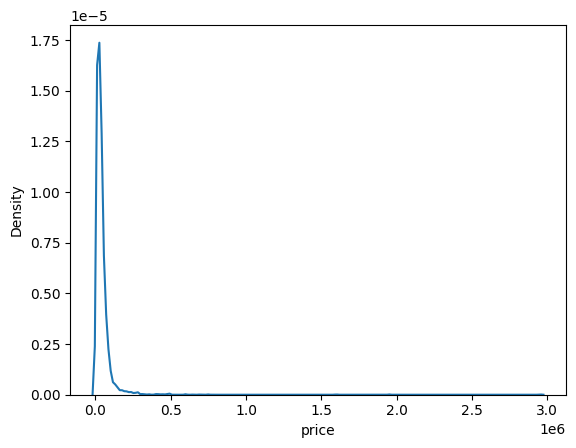

In [10]:
sns.kdeplot(df.price)

<Axes: xlabel='price', ylabel='Density'>

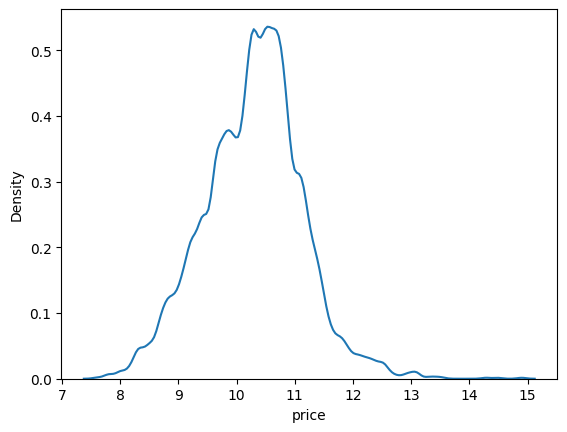

In [11]:
sns.kdeplot(np.log(df.price))

**Converted to normal distribution**

In [12]:
df.loc[df.price == df.price.min()].shape, df.price.min()

((56, 13), np.int64(2000))

In [13]:
df.loc[df.price == df.price.max()].shape, df.price.max()

((50, 13), np.int64(2954083))

In [14]:
df.milage.min(), df.loc[df.milage == df.milage.min()].shape

(np.int64(100), (20, 13))

In [15]:
df.milage.max(), df.loc[df.milage == df.milage.max()].shape

(np.int64(405000), (8, 13))

In [16]:
df.loc[df.milage == df.milage.max()]

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
24014,24014,Ford,F-150 XLT,2018,405000,E85 Flex Fuel,385.0HP 5.0L 8 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,White,Gray,At least 1 accident or damage reported,Yes,35000
36080,36080,Chevrolet,Camaro 1SS,2019,405000,Gasoline,455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,6-Speed M/T,Orange,Black,None reported,Yes,71950
45077,45077,Toyota,Tacoma TRD Sport,2018,405000,Gasoline,278.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed M/T,Black,Black,None reported,Yes,30000
45288,45288,Toyota,Tacoma TRD Sport,2018,405000,Gasoline,278.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,20995
61730,61730,Porsche,911 Carrera Cabriolet,1998,405000,Gasoline,300.0HP 3.4L Flat 6 Cylinder Engine Gasoline Fuel,6-Speed M/T,Blue,Black,None reported,Yes,124995
126917,126917,Volvo,S40 T5,2005,405000,Gasoline,218.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,6-Speed M/T,Gold,Beige,None reported,Yes,10500
137357,137357,Volkswagen,Golf GTI 2.0T SE 4-Door,2016,405000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed M/T,Blue,Black,None reported,Yes,18000
161337,161337,Volkswagen,CC 2.0T Sport,2016,405000,Gasoline,200.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Gray,At least 1 accident or damage reported,Yes,17500


In [17]:
df.loc[(df.brand == 'Volkswagen') & (df.model_year == 2016) & (df.model == 'Golf GTI 2.0T SE 4-Door') & (df.engine == '240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel')]

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
23276,23276,Volkswagen,Golf GTI 2.0T SE 4-Door,2016,120000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,3600
74926,74926,Volkswagen,Golf GTI 2.0T SE 4-Door,2016,87501,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,9-Speed A/T,White,Black,None reported,Yes,15500
91926,91926,Volkswagen,Golf GTI 2.0T SE 4-Door,2016,92203,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed M/T,White,Black,None reported,Yes,16000
137357,137357,Volkswagen,Golf GTI 2.0T SE 4-Door,2016,405000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed M/T,Blue,Black,None reported,Yes,18000


In [18]:
df.loc[df.milage > 400000].shape, df.loc[df.milage > 300000].shape, df.loc[df.milage > 250000].shape, df.loc[df.milage > 100000].shape, df.shape

((9, 13), (63, 13), (315, 13), (42461, 13), (188533, 13))

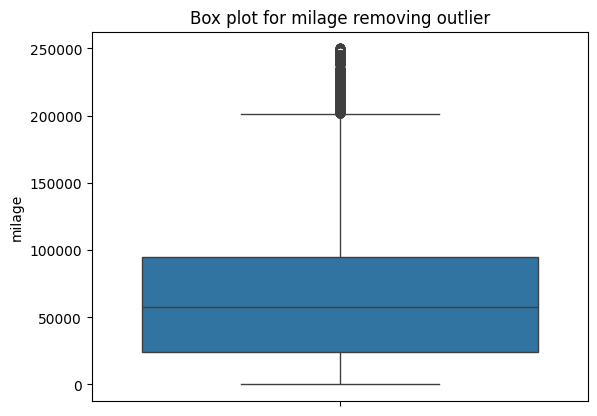

In [19]:
sns.boxplot(df.loc[df.milage <= 250000].milage)
plt.title("Box plot for milage removing outlier")
plt.show()

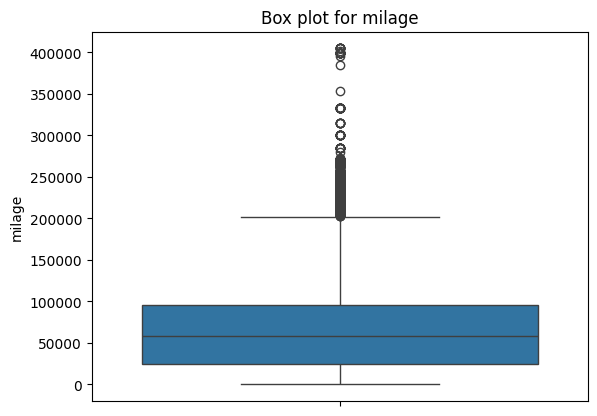

In [20]:
sns.boxplot(df.milage)
plt.title("Box plot for milage")
plt.show()

Clearly these are outliers

In [21]:
df.price.max()

np.int64(2954083)

In [22]:
df.loc[df.price > 2000000].shape, df.loc[df.price > 2500000].shape, df.loc[df.price > 1000000].shape, df.loc[df.price > 1500000].shape

((50, 13), (50, 13), (148, 13), (148, 13))

In [23]:
df.loc[df.price == df.price.max()].sample(3)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
80269,80269,GMC,Sierra 1500 SLE1 Extended Cab,2020,2750,Gasoline,5.3L V8 16V GDI OHV,6-Speed Automatic,Red,Black,None reported,Yes,2954083
89180,89180,Ford,Expedition Max King Ranch,2021,45979,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Black,Sandstone,None reported,Yes,2954083
157056,157056,Cadillac,XT5 Luxury,2021,16156,Gasoline,3.6L V6 24V MPFI DOHC,8-Speed Automatic,Shadow Black,Shara Beige,None reported,Yes,2954083


In [24]:
df.loc[df.price > 1000000].price.value_counts()

price
1599000    51
2954083    50
1950995    47
Name: count, dtype: int64

In [25]:
df.loc[df.price > 500000].price.value_counts()

price
1599000    51
2954083    50
749950     48
1950995    47
695000     45
599995     41
599000     36
649999     34
Name: count, dtype: int64

In [26]:
df.loc[df.price > 450000].price.value_counts()

price
489000     59
469900     57
1599000    51
2954083    50
749950     48
1950995    47
479995     46
695000     45
488880     44
599995     41
489995     40
491836     40
599000     36
649999     34
Name: count, dtype: int64

Considering 500000 and greater as outliers

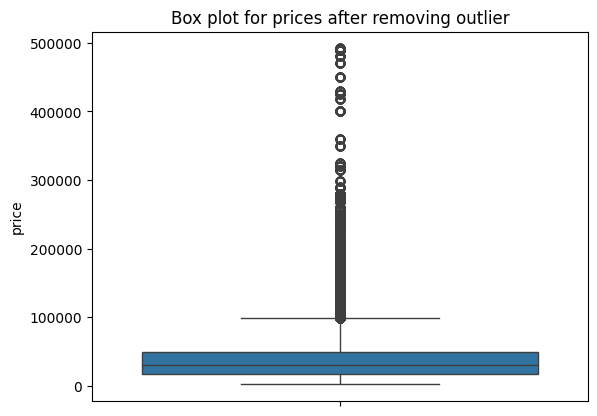

In [27]:
sns.boxplot(df.loc[df.price < 500000].price)
plt.title("Box plot for prices after removing outlier")
plt.show()

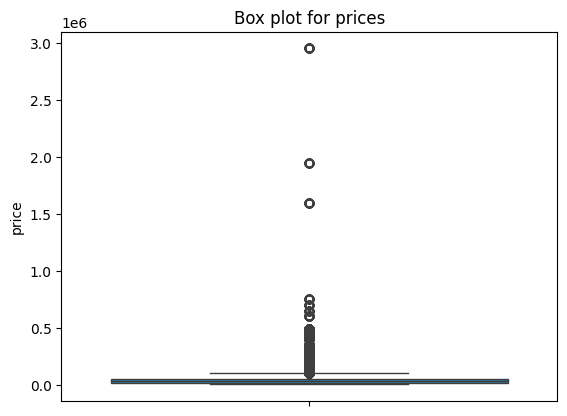

In [28]:
sns.boxplot(df.price)
plt.title("Box plot for prices")
plt.show()

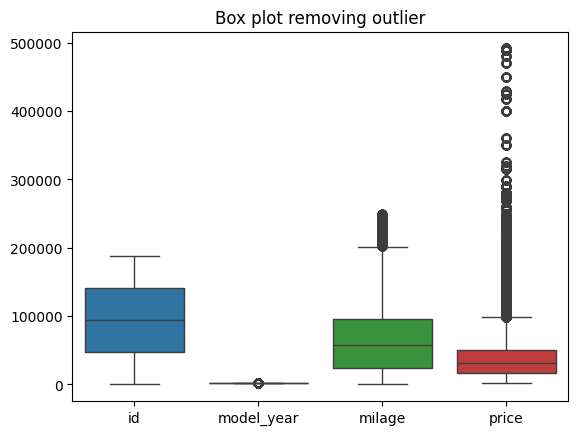

In [29]:
sns.boxplot(df.loc[(df.price < 500000) & (df.milage < 250000)])
plt.title("Box plot removing outlier")
plt.show()

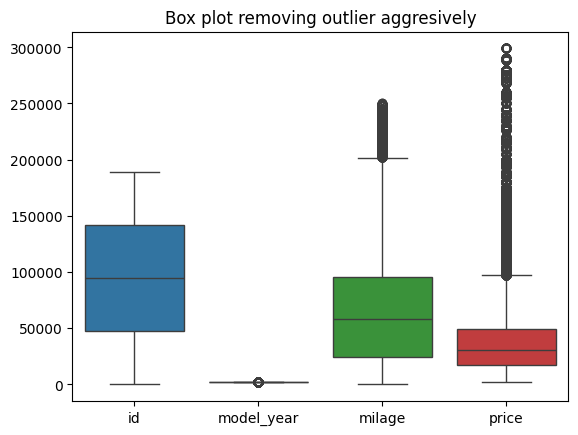

In [30]:
sns.boxplot(df.loc[(df.price < 300000) & (df.milage < 250000)])
plt.title("Box plot removing outlier aggresively")
plt.show()

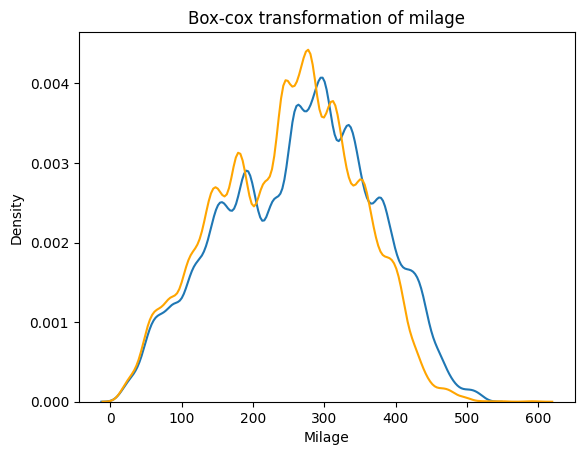

In [31]:
sns.kdeplot(scipy.stats.boxcox(df.loc[df.milage < 250000].milage)[0])
sns.kdeplot(scipy.stats.boxcox(df.milage)[0], color='orange')
plt.title("Box-cox transformation of milage")
plt.xlabel("Milage")
plt.show()

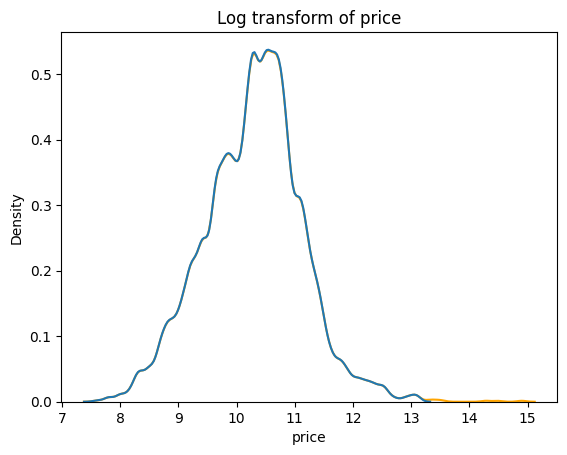

In [32]:
sns.kdeplot(np.log(df.price), color='orange')
sns.kdeplot(np.log(df.loc[df.price < 500000].price))
plt.title("Log transform of price")
plt.show()

In [33]:
df.clean_title.value_counts()

clean_title
Yes    167114
Name: count, dtype: int64

# Outlier detection and handling

In [34]:
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [35]:
def outlier_detection(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR

    print(f"\n{column}: min={df[column].min()}, max={df[column].max()}")
    print(f"{column}: lower bound={lower_bound}, upper bound={upper_bound}")
    outliers = df.loc[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    print(f"Outliers: {outliers}, percentage: {outliers*100/df.shape[0]}")

for col in df.select_dtypes(include='number').columns:
    if col in ['id', 'model_year']:
        pass
    else:
        outlier_detection(col)



milage: min=100, max=405000
milage: lower bound=-82812.5, upper bound=202327.5
Outliers: 1766, percentage: 0.9367060408522646

price: min=2000, max=2954083
price: lower bound=-32350.0, upper bound=99250.0
Outliers: 10880, percentage: 5.770873003665141


### price

In [36]:
df.loc[df.price < 10000].shape, df.loc[df.price < 5000].shape, df.loc[df.price < 3000].shape, df.shape

((20194, 13), (3649, 13), (432, 13), (188533, 13))

In [37]:
df.loc[df.price == df.price.min()].sort_values(['brand', 'model_year'])

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
17849,17849,Acura,MDX Touring,2007,116000,Gasoline,260.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Gray,Brown,At least 1 accident or damage reported,Yes,2000
155411,155411,Audi,A5 2.0T Premium Plus,2012,130000,Gasoline,211.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,At least 1 accident or damage reported,Yes,2000
35158,35158,BMW,M3 Base,2003,91677,Gasoline,333.0HP 3.2L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,2000
105435,105435,Cadillac,DeVille Base,1994,58981,–,–,A/T,White,Blue,At least 1 accident or damage reported,Yes,2000
11146,11146,Chevrolet,Monte Carlo SS,2001,64776,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,4-Speed A/T,Gray,Black,None reported,Yes,2000
81089,81089,Chevrolet,Corvette Base,2001,199000,Gasoline,300.0HP 5.4L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Beige,None reported,Yes,2000
71469,71469,Chevrolet,Camaro 1LT,2003,95000,Gasoline,312.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,2000
112731,112731,Chevrolet,C70 T5,2006,143250,Gasoline,295.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,6-Speed M/T,Gray,Black,None reported,Yes,2000
38172,38172,Chevrolet,Corvette Base,2008,130000,Gasoline,345.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,6-Speed M/T,Red,Black,None reported,Yes,2000
72637,72637,Dodge,Dakota Sport,2003,192100,Gasoline,210.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Gray,At least 1 accident or damage reported,Yes,2000


Looking at prices from the internet, lower values looks suspicious.

### milage

In [38]:
df.loc[df.milage < 1000].shape, df.loc[df.milage < 2500].shape, df.loc[df.milage < 5000].shape, df.loc[df.milage < 10000].shape, df.shape

((1621, 13), (5776, 13), (11464, 13), (20662, 13), (188533, 13))

In [39]:
df.loc[df.milage == df.milage.min()]

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
13505,13505,Toyota,Land Cruiser Base,2016,100,Gasoline,381.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes,99000
15805,15805,Lexus,RX 350 Base,2022,100,Gasoline,295.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Silver,Black,None reported,Yes,66200
20294,20294,Audi,Q8 55 Premium Plus,2023,100,Hybrid,335.0HP 3.0L V6 Cylinder Engine Gasoline/Mild ...,8-Speed A/T,Gray,Red,None reported,Yes,75000
26319,26319,Chevrolet,Corvette Stingray w/1LT,2021,100,Gasoline,490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,A/T,White,Beige,At least 1 accident or damage reported,Yes,60500
28114,28114,Porsche,911 Carrera S,2023,100,Gasoline,3.0L H6 24V GDI DOHC Twin Turbo,8-Speed Automatic,Red,Black,None reported,NaN,77430
36083,36083,Chevrolet,Corvette Stingray w/1LT,2023,100,Gasoline,490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Gray,Black,None reported,Yes,80000
42510,42510,Tesla,Model S P100D,2023,100,NaN,Electric Motor Electric Fuel System,A/T,Silver,Black,None reported,Yes,52645
84598,84598,Dodge,Viper SRT-10,2005,100,Gasoline,500.0HP 8.3L 10 Cylinder Engine Gasoline Fuel,6-Speed M/T,Orange,Gray,None reported,Yes,60500
90373,90373,Tesla,Model 3 Long Range,2021,100,NaN,271.0HP Electric Motor Electric Fuel System,A/T,White,Black,None reported,Yes,29999
97748,97748,GMC,Sierra 1500 AT4,2023,100,Gasoline,401.0HP 6.6L 8 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,23500


Lower milage values looks suspicious as well.

### We'll consider outliers for:
**Price:**
- Lower bound: 5000
- Upper bound: 500000

**Milage:**
- Lower bound: 2500
- Upper bound: 250000

#### We will make these NaNs and impute values by KNN imputer

In [40]:
df.loc[(df.price <= 5000) | (df.price >= 500000), 'price'] = np.nan
df.loc[(df.milage <= 2500) | (df.milage >= 250000), 'milage'] = np.nan

df.isna().sum()[df.isna().sum() > 0]

milage          6301
fuel_type       5083
accident        2452
clean_title    21419
price           4525
dtype: int64

In [41]:
df.sample(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
154272,154272,Cadillac,Escalade ESV Sport,2021,72843.0,Gasoline,6.2L V8 16V GDI OHV,10-Speed Automatic,Black Raven,Jet Black,None reported,NaN,72980.0
130780,130780,GMC,Yukon Denali,2016,92700.0,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,At least 1 accident or damage reported,Yes,47995.0
51675,51675,Ford,F-150 Lariat,2019,67800.0,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Gray,Black,None reported,Yes,34500.0
117427,117427,Toyota,Highlander Limited,2020,53550.0,Gasoline,3.5L V6 24V PDI DOHC,8-Speed Automatic,White,Gray,None reported,Yes,39687.0
178743,178743,Subaru,Impreza 2.0i,2017,90000.0,Gasoline,152.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Gray,Beige,None reported,Yes,32000.0


# Missing Values Imputation

We'll replace NaNs in clean_title with No

### Filling missing values Strategy:
- milage: KNN (as milage of a particular car should be near to the values of similar cars)
- fuel_type: KNN (as fuel type of a particular car should be near to the values of similar cars)
- accident: interpolation of last value (trying at random)
- clean_title: 'No' (as there are only 'Yes', so assuming other values as 'No')
- price: KNN (as price of a particular car should be near to the values of similar cars)

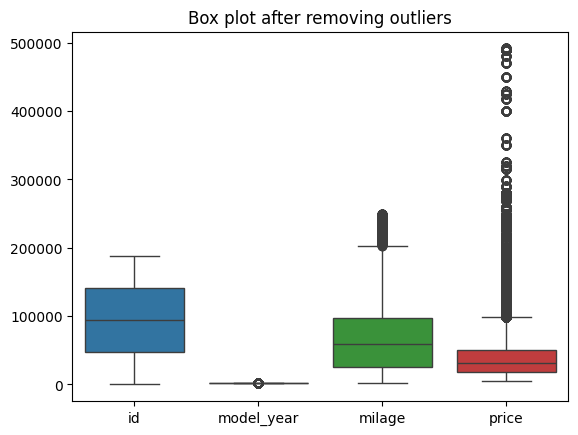

In [42]:
sns.boxplot(df)
plt.title("Box plot after removing outliers")
plt.show()

In [43]:
df.clean_title.fillna('No', inplace=True)
df.clean_title.value_counts(), df.clean_title.isna().sum()

C:\Users\MercadosEMI\AppData\Local\Temp\ipykernel_24880\3812891104.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.clean_title.fillna('No', inplace=True)


(clean_title
 Yes    167114
 No      21419
 Name: count, dtype: int64,
 np.int64(0))

In [44]:
df.accident.bfill(inplace=True)
df.accident.value_counts(), df.accident.isna().sum()

C:\Users\MercadosEMI\AppData\Local\Temp\ipykernel_24880\520251806.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.accident.bfill(inplace=True)


(accident
 None reported                             146433
 At least 1 accident or damage reported     42100
 Name: count, dtype: int64,
 np.int64(0))

In [45]:
df.isna().sum()[df.isna().sum() > 0]

milage       6301
fuel_type    5083
price        4525
dtype: int64

In [46]:
from sklearn.impute import KNNImputer

In [47]:
imputer = KNNImputer(n_neighbors=5, weights='distance')
imputed_df = imputer.fit_transform(df[['milage', 'price']])

In [48]:
df[['milage', 'price']] = imputed_df
df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000.0,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,17760.0
1,1,Lincoln,LS V8,2002,143250.0,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,21599.8
2,2,Chevrolet,Silverado 2500 LT,2002,136731.0,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500.0,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000.0
4,4,Mercedes-Benz,Metris Base,2021,7388.0,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000.0,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500.0
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600.0,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000.0
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650.0,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900.0
188531,188531,Audi,S5 3.0T Prestige,2022,13895.0,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,No,84900.0


In [49]:
df.isna().sum()[df.isna().sum() > 0]

fuel_type    5083
dtype: int64

### fuel_type

In [50]:
df.fuel_type.value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

In [51]:
df.loc[df.fuel_type == 'not supported'].head(2)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
4823,4823,Chevrolet,Suburban LT,2011,109646.0,not supported,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Beige,None reported,Yes,18998.0
18000,18000,Porsche,Camaro 2SS,2015,67000.0,not supported,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,11500.0


In [52]:
df.loc[df.fuel_type == '–', 'fuel_type'] = np.nan
df.fuel_type.value_counts(), df.isna().sum()[df.isna().sum()>0]

(fuel_type
 Gasoline          165940
 Hybrid              6832
 E85 Flex Fuel       5406
 Diesel              3955
 Plug-In Hybrid       521
 not supported         15
 Name: count, dtype: int64,
 fuel_type    5864
 dtype: int64)

In [53]:
yearly_fuel = df.groupby(['model_year', 'fuel_type']).id.count().reset_index().groupby(['model_year']).apply(lambda x: x.nlargest(1, 'id')).reset_index(drop=True)
yearly_fuel.drop(columns=['id'], inplace=True)
yearly_fuel

C:\Users\MercadosEMI\AppData\Local\Temp\ipykernel_24880\3129532438.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_fuel = df.groupby(['model_year', 'fuel_type']).id.count().reset_index().groupby(['model_year']).apply(lambda x: x.nlargest(1, 'id')).reset_index(drop=True)


,model_year,fuel_type
0,1974,Gasoline
1,1992,Gasoline
2,1993,Gasoline
3,1994,Gasoline
4,1995,Gasoline
5,1996,Gasoline
6,1997,Gasoline
7,1998,Gasoline
8,1999,Gasoline
9,2000,Gasoline


#### Gasoline is the most common fuel type in every year
**So, filling nans with Gasoline**

In [54]:
df['fuel_type'].fillna(df.fuel_type.mode()[0], inplace=True)
df.fuel_type.isna().sum(), df.fuel_type.value_counts()

C:\Users\MercadosEMI\AppData\Local\Temp\ipykernel_24880\3421561027.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel_type'].fillna(df.fuel_type.mode()[0], inplace=True)


(np.int64(0),
 fuel_type
 Gasoline          171804
 Hybrid              6832
 E85 Flex Fuel       5406
 Diesel              3955
 Plug-In Hybrid       521
 not supported         15
 Name: count, dtype: int64)

In [55]:
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

### Now we have elimiated outliers and all missing values are imputed.

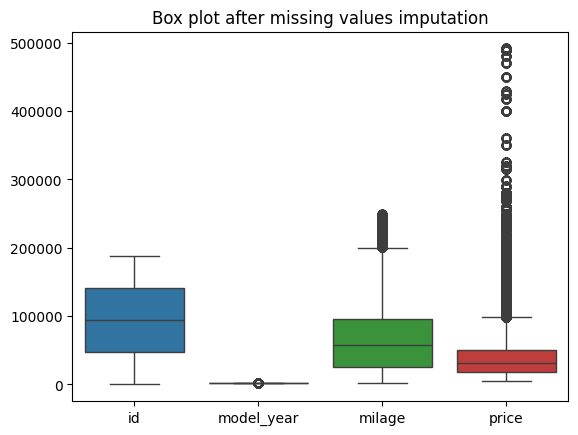

In [56]:
sns.boxplot(df)
plt.title("Box plot after missing values imputation")
plt.show()

In [57]:
df.sample(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
78536,78536,BMW,M2 Competition,2020,28690.0,Gasoline,405.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,7-Speed A/T,Black,Black,None reported,Yes,319900.0
143938,143938,Tesla,Model Y Performance,2021,63030.0,Gasoline,455.0HP Electric Motor Electric Fuel System,A/T,White,White,None reported,Yes,28000.0
55453,55453,Chevrolet,Tahoe LT,2016,20800.0,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,20900.0
120320,120320,Lamborghini,Huracan LP580-2S,2018,15509.0,Gasoline,5.2L V10 40V GDI DOHC,7-Speed Automatic with Auto-Shift,Rosso Mars Metallic,Nero Ade,None reported,No,229900.0
42282,42282,Cadillac,Escalade Premium Luxury,2021,88450.0,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,A/T,White,Brown,None reported,Yes,89995.0


# Feature Engineering

In [58]:
df.engine.value_counts()

engine
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel           3462
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel           2902
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel           2841
2.0L I4 16V GDI DOHC Turbo                             2680
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel          2451
                                                       ... 
78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel               1
139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas       1
151.0HP 1.5L 4 Cylinder Engine Gas/Electric Hybrid        1
184.0HP 2.4L 4 Cylinder Engine Flex Fuel Capability       1
313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas       1
Name: count, Length: 1117, dtype: int64

In [59]:
df['HP'] = df.engine.apply(lambda x: x[:x.index('H')] if 'H' in x else np.nan)
df.head(2)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,HP
0,0,MINI,Cooper S Base,2007,213000.0,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,17760.0,172.0
1,1,Lincoln,LS V8,2002,143250.0,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,21599.8,252.0


In [60]:
df['litres'] = df.engine.apply(lambda x: ''.join(list(filter(lambda x: x.count('L')==1, x.split(' '))))[:-1])
df.head(2)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,HP,litres
0,0,MINI,Cooper S Base,2007,213000.0,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,17760.0,172.0,1.6
1,1,Lincoln,LS V8,2002,143250.0,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,21599.8,252.0,3.9


In [61]:
# Non Cylindrical engines

n = df.engine.value_counts().reset_index()
n['ss'] = n.engine.apply(lambda x: x.split(' ').count('Cylinder')==0)
n.loc[n.ss == True].engine.value_counts()


engine
2.0L I4 16V GDI DOHC Turbo                     1
3.5L V6 24V PDI DOHC Twin Turbo                1
5.7L V8 16V MPFI OHV                           1
4.0L V8 32V GDI DOHC Twin Turbo                1
3.6L V6 24V MPFI DOHC                          1
                                              ..
120 AH                                         1
1.8 Liter                                      1
115.0HP Electric Motor Electric Fuel System    1
3.8L V6 12V MPFI OHV                           1
111.0HP Electric Motor Electric Fuel System    1
Name: count, Length: 228, dtype: int64

In [62]:
df.HP.value_counts(), df.litres.value_counts()

(HP
 300.0                 5416
 355.0                 4433
 420.0                 4020
 240.0                 3634
 400.0                 3518
                       ... 
 3.8L V6 12V MPFI O       2
 70.0                     1
 111.0                    1
 78.0                     1
 313.0                    1
 Name: count, Length: 446, dtype: int64,
 litres
 3.0         23929
 3.5         21216
 2.0         20486
 6.2         10831
 4.0         10592
             ...  
 LiterULE       20
 8.0            20
 8.4            18
 7.4            16
 1.0             1
 Name: count, Length: 66, dtype: int64)

In [63]:
df['HP'] = pd.to_numeric(df['HP'], errors='coerce')
df['litres'] = pd.to_numeric(df['litres'], errors='coerce')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            188533 non-null  int64  
 1   brand         188533 non-null  object 
 2   model         188533 non-null  object 
 3   model_year    188533 non-null  int64  
 4   milage        188533 non-null  float64
 5   fuel_type     188533 non-null  object 
 6   engine        188533 non-null  object 
 7   transmission  188533 non-null  object 
 8   ext_col       188533 non-null  object 
 9   int_col       188533 non-null  object 
 10  accident      188533 non-null  object 
 11  clean_title   188533 non-null  object 
 12  price         188533 non-null  float64
 13  HP            155274 non-null  float64
 14  litres        174319 non-null  float64
dtypes: float64(4), int64(2), object(9)
memory usage: 21.6+ MB


In [65]:
df.HP.value_counts(), df.litres.value_counts()

(HP
 300.0    5416
 355.0    4433
 420.0    4020
 240.0    3634
 400.0    3518
          ... 
 141.0       2
 70.0        1
 111.0       1
 78.0        1
 313.0       1
 Name: count, Length: 348, dtype: int64,
 litres
 3.0    23929
 3.5    21216
 2.0    20486
 6.2    10831
 4.0    10592
        ...  
 1.2       26
 8.0       20
 8.4       18
 7.4       16
 1.0        1
 Name: count, Length: 61, dtype: int64)

In [66]:
df.isna().sum()[df.isna().sum()>0]

HP        33259
litres    14214
dtype: int64

In [67]:
imputed_df = imputer.fit_transform(df[['HP', 'litres']])
df[['HP', 'litres']] = imputed_df
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

# Encoding Categorical columns

In [68]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['brand_encoded'] = le.fit_transform(df['brand'])

model_encoders = {}

def encoding_product(row):
    brand = row['brand']
    model = row['model']
    if brand not in model_encoders:
        model_encoders[brand] = LabelEncoder()
        model_encoders[brand].fit(df[df['brand']==brand]['model'])
    return model_encoders[brand].transform([model])[0]

df['model_encoded'] = df.apply(encoding_product, axis=1)
df.head(2)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,HP,litres,brand_encoded,model_encoded
0,0,MINI,Cooper S Base,2007,213000.0,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,17760.0,172.0,1.6,31,4
1,1,Lincoln,LS V8,2002,143250.0,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,21599.8,252.0,3.9,28,38


In [69]:
df.brand_encoded.nunique(), df.brand.nunique()

(57, 57)

In [70]:
df['accident'] = le.fit_transform(df['accident'])
df['clean_title'] = le.fit_transform(df['clean_title'])
df['int_col'] = le.fit_transform(df['int_col'])
df['ext_col'] = le.fit_transform(df['ext_col'])
df['transmission'] = le.fit_transform(df['transmission'])
df['fuel_type'] = le.fit_transform(df['fuel_type'])
df['engine'] = le.fit_transform(df['engine'])
df.drop(columns=['id', 'brand', 'model'], inplace=True)
df.rename(columns={'brand_encoded': 'brand', 'model_encoded': 'model'}, inplace=True)
df.head(2)


,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,HP,litres,brand,model
0,2007,213000.0,2,116,38,312,71,1,1,17760.0,172.0,1.6,31,4
1,2002,143250.0,2,366,38,263,10,0,1,21599.8,252.0,3.9,28,38


In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
model_year,188533.0,2015.829998,5.660967,1974.00,2013.0,2017.0,2020.0,2024.0
milage,188533.0,66358.298746,48152.822102,2520.00,25500.0,58000.0,95400.0,249999.0
fuel_type,188533.0,1.971374,0.399717,0.00,2.0,2.0,2.0,5.0
engine,188533.0,612.825489,278.163140,0.00,385.0,627.0,853.0,1116.0
transmission,188533.0,29.668827,13.007453,0.00,20.0,32.0,38.0,51.0
ext_col,188533.0,157.330478,114.585328,0.00,29.0,128.0,281.0,318.0
int_col,188533.0,34.996696,39.856868,0.00,14.0,14.0,56.0,155.0
accident,188533.0,0.776697,0.416461,0.00,1.0,1.0,1.0,1.0
clean_title,188533.0,0.886391,0.317336,0.00,1.0,1.0,1.0,1.0
price,188533.0,41875.381327,44358.858755,5100.00,17500.0,30999.0,49900.0,491836.0


# Scaling

In [72]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['model_year', 'milage', 'engine', 'transmission',
       'ext_col', 'int_col', 'HP', 'litres', 'brand', 'model']

ss = StandardScaler()
df[columns_to_scale] = ss.fit_transform(df[columns_to_scale])
df

,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,HP,litres,brand,model
0,-1.559808,3.045348,2,-1.786099,0.640494,1.349823,0.903317,1,1,17760.0,-1.529888,-1.673523,0.493978,-1.168387
1,-2.443052,1.596831,2,-0.887343,0.640494,0.922193,-0.627163,0,1,21599.8,-0.799915,0.061179,0.304919,-0.642790
2,-2.443052,1.461449,1,0.097693,0.640494,-1.041414,0.903317,1,1,13900.0,-0.179438,1.117086,-0.892449,1.645103
3,0.206679,-0.973119,2,0.899383,1.486165,-1.119959,-0.526804,1,1,45000.0,0.733029,0.890820,-0.451314,-1.013800
4,0.913274,-1.224652,2,-1.272010,-0.512694,-1.119959,-0.627163,1,1,97500.0,-1.201400,-1.371836,0.809075,1.629644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,0.206679,-0.360484,2,0.910168,1.486165,1.280006,-0.627163,1,1,27500.0,0.733029,1.795882,-0.955469,-0.426368
188529,0.383328,-0.784137,2,0.565046,0.102340,1.280006,-0.526804,0,1,30000.0,0.413665,-0.617617,0.809075,-0.874671
188530,0.913274,-1.094607,2,1.107894,-0.512694,1.280006,-0.526804,1,1,86900.0,1.180137,0.136601,0.809075,-0.611872
188531,1.089923,-1.089519,2,-0.362470,-2.204037,-0.657420,-0.526804,1,0,84900.0,-0.011544,-0.617617,-1.270566,0.949460


In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['price']), df.price, test_size=0.1, random_state=42)

((X_train.shape, y_train.shape), (X_test.shape, y_test.shape))

(((169679, 13), (169679,)), ((18854, 13), (18854,)))

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

preds = model.predict(X_test)

In [75]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

mean_squared_error(preds, y_test), r2_score(preds, y_test)

(np.float64(1348942131.0955756), -1.0200508908898058)

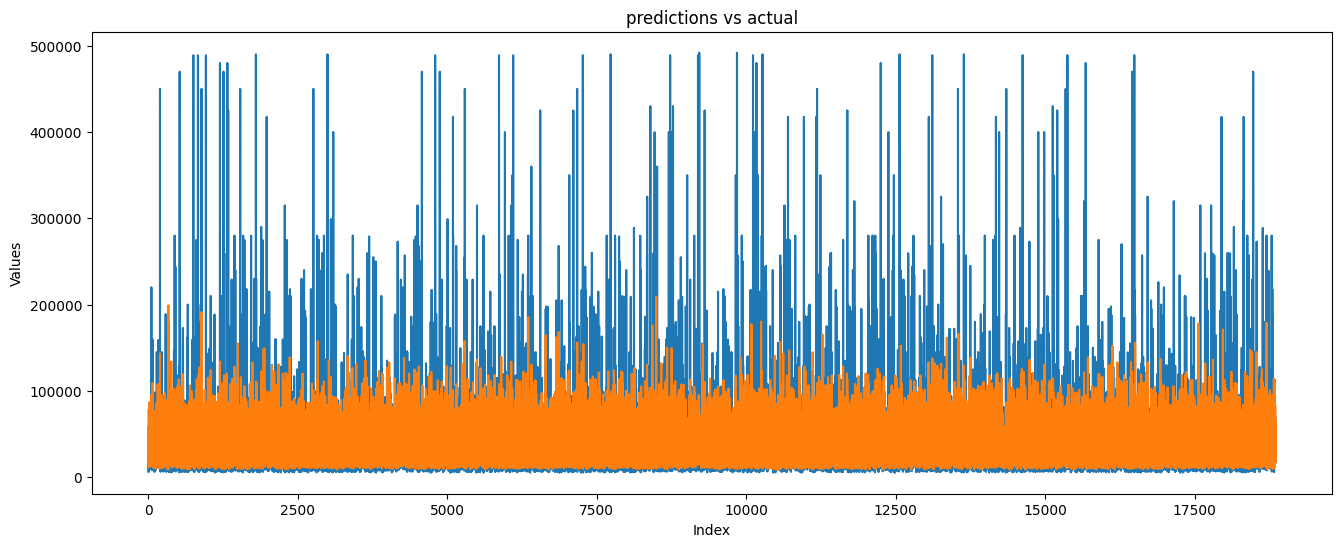

In [76]:
plt.figure(figsize=(16, 6))
plt.plot(pd.DataFrame(preds, y_test).reset_index())
plt.title("predictions vs actual")
plt.xlabel("Index")
plt.ylabel("Values")
plt.show()

In [77]:
mean_absolute_percentage_error(preds, y_test)*100

np.float64(37.21473952643704)

In [80]:
import joblib
joblib.dump(model, "../trained_models/model.pkl")

['../trained_models/model.pkl']